In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('CC GENERAL.csv')
df.drop('CUST_ID', axis=1, inplace=True)
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df = df.dropna(axis = 0, subset = ['CREDIT_LIMIT'])

In [99]:
class PCA ():

    def __init__(self,n_components = 0.95):
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X):

        self.mean = np.mean(X,axis=0)
        self.variance = np.var(X,axis=0)
        self.std = np.std(X,axis=0)
        X = (X-self.mean)/self.std
        #print("std_data =" ,X)
        # fill

        self.eigvalues,self.components = np.linalg.eig(np.round(np.cov(np.array(X).T),5)) #matrix (n,)
        #print("eig vectors\n",self.components.shape)
        #print("Eig Values:\n",self.eigvalues)
        #print("Eig Values:\n",sorted(self.eigvalues,reverse=True))
        
        if(self.type == 'var'):
            self.components = self.components[:,:self.n_components]
        else:
            self.cumulative_var=np.cumsum(self.eigvalues/np.sum(self.eigvalues))
            print(self.cumulative_var)
            #print(len(cumulative_var[cumulative_var<=self.n_components])+1)
            no_comp =len(self.cumulative_var[self.cumulative_var<self.n_components])+1
            self.components = self.components[:,:no_comp]
        return self.components

    def transform(self,Z):
        # fill
        return Z @ self.components

    #optional 
    def plot_explained_variance(self):
        #pass
        plt.scatter(x=range(len(self.cumulative_var)),y=self.cumulative_var)
        plt.show()

In [100]:
pca_section = PCA(n_components=0.95)
X_transofmed = pca_section.fit(df.values)

[0.27287846 0.47590525 0.56381568 0.63862553 0.70125725 0.75876061
 0.807632   0.85019724 0.88850239 0.91930286 0.94302276 0.96075984
 0.97502535 0.98719902 0.99732897 0.99999941 1.        ]


In [101]:
print(pca_section.components.shape)
print("expected shape: (17,5)")

(17, 12)
expected shape: (17,5)


In [102]:
pca_section.transform(df.values).shape

(8949, 12)

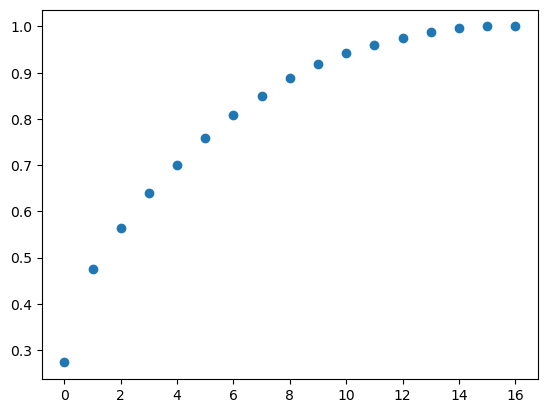

In [103]:
pca_section.plot_explained_variance()

In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.values)
#print(scaled_data)
pca = PCA(n_components=0.95)  # Adjust the number of components according to your needs
principal_components = pca.fit_transform(scaled_data)
print(principal_components.shape)

(8949, 12)
